## Clustering Exercise: Customer Segmentation in E-commerce

### Overview
<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online retail is a transactional data set</a> which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

| Column Name     | Description                                                         |
| --------------- | ------------------------------------------------------------------- |
| **InvoiceNo**   | Unique identifier for each transaction (a 6-digit integral number). |
| **StockCode**   | Product (item) code.                                                |
| **Description** | Product (item) name.                                                |
| **Quantity**    | The number of units of the product purchased per transaction.       |
| **InvoiceDate** | Date and time when the transaction occurred.                        |
| **UnitPrice**   | Price per unit of the product (in GBP).                             |
| **CustomerID**  | Unique identifier for each customer.                                |
| **Country**     | The name of the country where the customer resides.                 |


### Goal
We aim to develop suitable and efficient marketing strategy for each segement of the Customers. Therefore, clustering is required to find meaningful customers segments

### Approach
Apply K-means clustering to to segment customers based on existing behavior to predict how a new customer is likely to act in the future.  That should ensure the company can target its customers efficiently with a corresponding marketing strategy.

We will adopt the RFM analysis by calculating the three RFM metrics:
- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed).

We will use the RFM new variables as input for the clustering

Follow the Jupyter notebook below and answer the tasks marked as ✅ Task for Students.

<a id="1"></a> <br>
### 1. Import the basic packages and set the random seed

In [1]:
# import required libraries for dataframe and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# to ensure reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

### 2. Load and Preview the Data

Start by loading the dataset and inspecting the first few rows.

In [5]:
# Load the dataset
data=pd.read_csv('./OnlineRetail.csv', encoding= 'cp1252' , header=0)

# Preview the dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# check column types and existance of NaNs
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
# check the distribution of the numerical features
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
data[(data.UnitPrice < 0) | (data.Quantity < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [18]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<a id="2"></a> <br>
### 3. Data Cleansing

✅ Task for Students: Drop rows with missing values.

In [22]:
# Drop all rows with missing values: this will drop all rows where customer ID is missing, notice that this cannot be imputed
# your code here
df =data.copy()
df = df[~df.CustomerID.isnull()]

In [24]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

✅ Task for Students: Remove any entries where `Quantity` or `UnitPrice` is zero or negative, as these entries likely represent errors.

In [32]:
# Remove rows with Quantity and UnitPrice <= 0
# your code here
df =df[(df.Quantity > 0) & (df.UnitPrice >0)]

In [35]:
# Confirm cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


<a id="3"></a> <br>
### 4. Feature Engineering

✅ Task for Students:
For customer segmentation, it is often need to conduct an RFM analysis by calculating three customers metrics:
- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed).

Your task is to compute these three features for each customer.

In [ ]:
from datetime import datetime

df.InvoiceDate = pd.to_datetime(df['InvoiceDate'])

/var/folders/cl/26d03_816gs8chpf9scfjw6r0000gn/T/ipykernel_79907/3208914119.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.InvoiceDate = pd.to_datetime(df['InvoiceDate'])


In [50]:
#set reference date: 1 day before the last purchase day in the dataset (not now)
reference_date = df.InvoiceDate.max() +pd.Timedelta(days=1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [56]:
#Step1: calculate Recency
recency = df.groupby('CustomerID')['InvoiceDate'].max()
recency = (reference_date-recency).dt.days
recency = recency.reset_index()
recency.columns = ['CustomerID','Recency']
recency

,CustomerID,Recency
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310
...,...,...
4333,18280.0,278
4334,18281.0,181
4335,18282.0,8
4336,18283.0,4


In [63]:
#Step2: calculate frequency (number of transactions = number of unique invoices)
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID','Frequency']
frequency

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4333,18280.0,1
4334,18281.0,1
4335,18282.0,2
4336,18283.0,16


In [75]:
#Step 3: calculate Monetary (total amount of transaction with revenue)

df['TotalPrice'] = df.UnitPrice * df.Quantity
monetary = df.groupby('CustomerID')['TotalPrice'].sum()
monetary = monetary.reset_index()
monetary.columns = ['CustomerID','Monetary']
monetary



/var/folders/cl/26d03_816gs8chpf9scfjw6r0000gn/T/ipykernel_79907/2684763875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df.UnitPrice * df.Quantity


,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2094.88


In [76]:
#Step 4: merge all of these component into 1 dataframe
rfm = recency.merge(frequency, on = 'CustomerID').merge(monetary, on = 'CustomerID')
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4333,18280.0,278,1,180.60
4334,18281.0,181,1,80.82
4335,18282.0,8,2,178.05
4336,18283.0,4,16,2094.88


### 5. Data Exploration and Visualization

Use visualizations to understand the distributions of **Recency**, **Frequency**, and **Monetary** values.

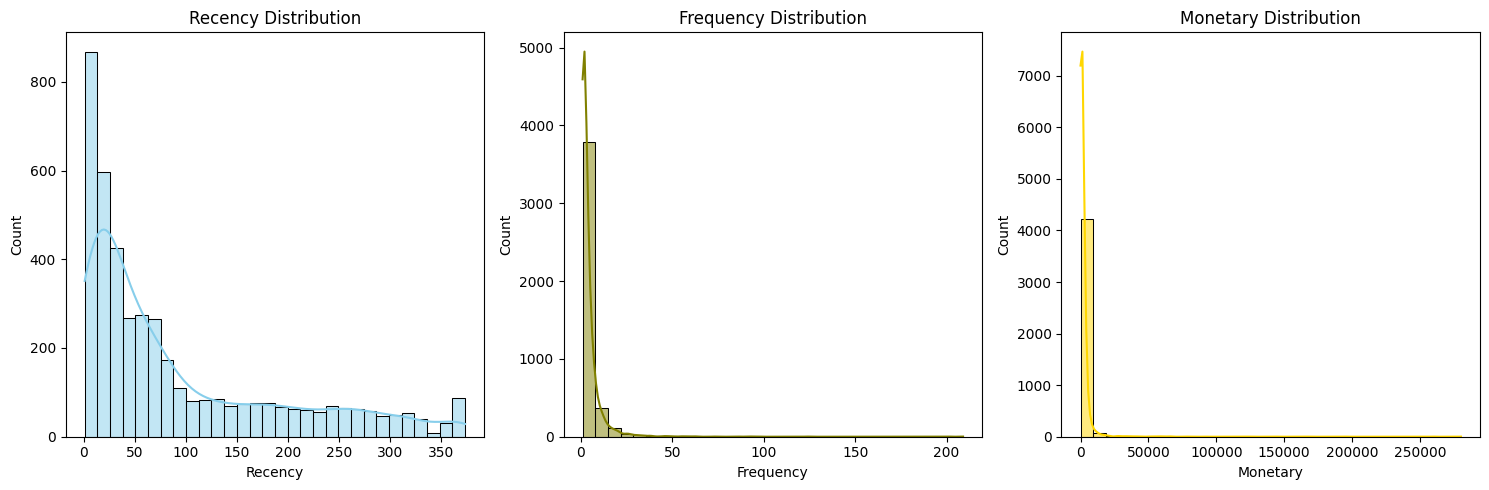

In [78]:
# Plot histograms for each RFM metric
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(rfm['Recency'], bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title('Recency Distribution')

sns.histplot(rfm['Frequency'], bins=30, kde=True, ax=axes[1], color="olive")
axes[1].set_title('Frequency Distribution')

sns.histplot(rfm['Monetary'], bins=30, kde=True, ax=axes[2], color="gold")
axes[2].set_title('Monetary Distribution')

plt.tight_layout()
plt.show()

✅ Task for Students: use box plot to plot the distribution of each the new features 

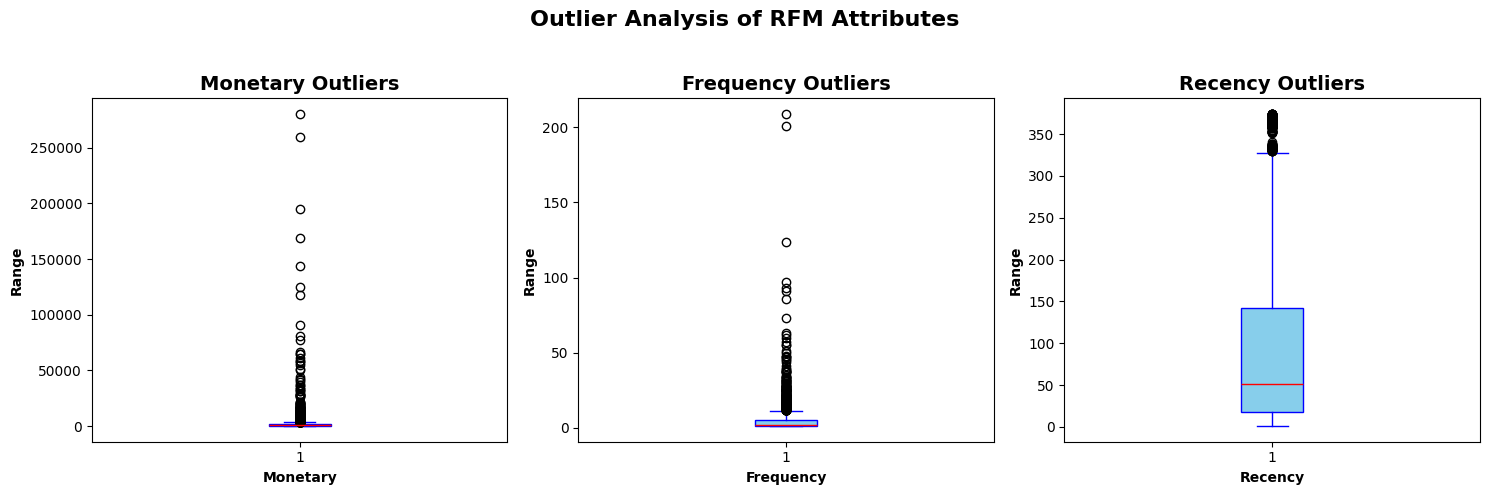

In [79]:
# Outlier Analysis of Amount, Frequency, and Recency
attributes = ['Monetary', 'Frequency', 'Recency']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each attribute in a separate subplot
for i, attr in enumerate(attributes):
    axes[i].boxplot(rfm[attr], vert=True, patch_artist=True, 
                    boxprops=dict(facecolor="skyblue", color="blue"),
                    medianprops=dict(color="red"),
                    whiskerprops=dict(color="blue"),
                    capprops=dict(color="blue"))
    
    # Set title and labels for each subplot
    axes[i].set_title(f"{attr} Outliers", fontsize=14, fontweight='bold')
    axes[i].set_ylabel("Range", fontweight='bold')
    axes[i].set_xlabel(attr, fontweight='bold')

# Adjust layout
plt.suptitle("Outlier Analysis of RFM Attributes", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Notice: An outlier: is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal.

✅ Task for students: Use the Interquartile Range (IQR) method to replace outliers. 

**The Interquartile Range (IQR) method** is a statistical approach to identify outliers in a dataset. It calculates the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. Data points outside the "fence" defined by Q1 - 1.5xIQR and Q3 + 1.5xIQR are considered outliers.

In [80]:
k = 1.5
#Removing outliers for Recency
Q1_r = rfm.Recency.quantile(0.25)
Q3_r = rfm.Recency.quantile(0.75)
IQR_r = Q3_r-Q1_r
rfm = rfm[ (rfm.Recency >= Q1_r - k*IQR_r) & (rfm.Recency <= Q3_r + k* IQR_r) ]

#Removing outliers for Frequency
Q1_f = rfm.Frequency.quantile(0.25)
Q3_f = rfm.Frequency.quantile(0.75)
IQR_f = Q3_f - Q1_f
rfm = rfm[(rfm.Frequency >= Q1_f - k*IQR_f) & (rfm.Frequency <= Q3_f + k * IQR_f)]

#Removing outliers for Monetary
Q1 = rfm.Monetary.quantile(0.25)
Q3 = rfm.Monetary.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Monetary >= Q1 - k * IQR) & (rfm.Monetary <= Q3 + k * IQR)]

rfm

,CustomerID,Recency,Frequency,Monetary
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
5,12352.0,36,8,2506.04
6,12353.0,204,1,89.00
...,...,...,...,...
4332,18278.0,74,1,173.90
4333,18280.0,278,1,180.60
4334,18281.0,181,1,80.82
4335,18282.0,8,2,178.05


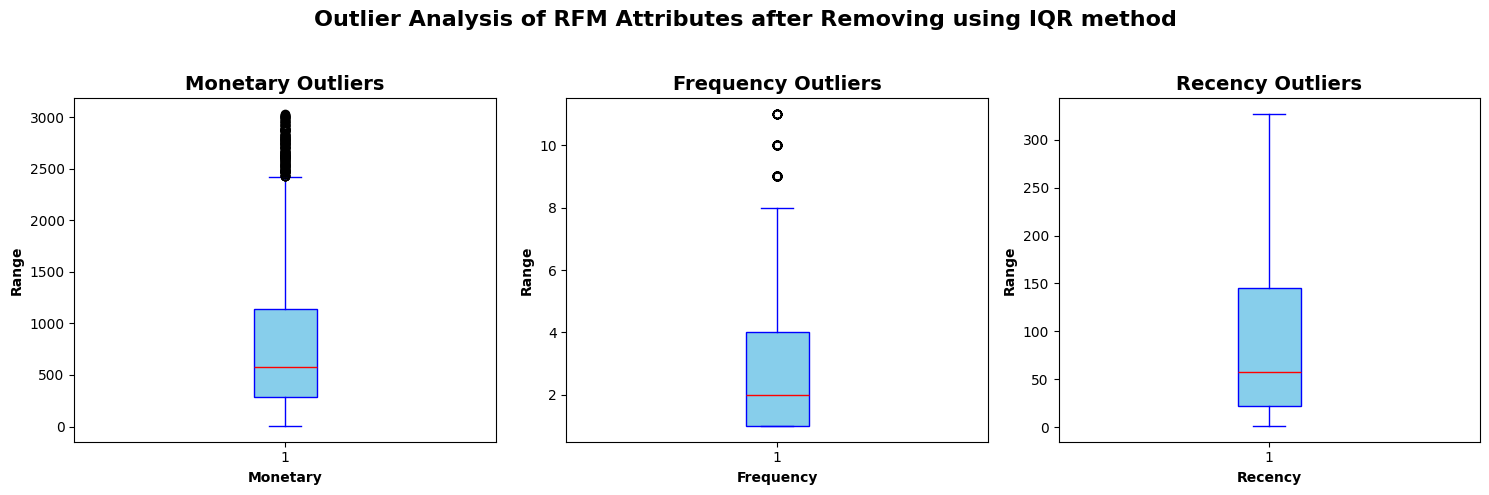

In [82]:
# Outlier Analysis of Amount, Frequency, and Recency after remove outliers
attributes = ['Monetary', 'Frequency', 'Recency']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each attribute in a separate subplot
for i, attr in enumerate(attributes):
    axes[i].boxplot(rfm[attr], vert=True, patch_artist=True, 
                    boxprops=dict(facecolor="skyblue", color="blue"),
                    medianprops=dict(color="red"),
                    whiskerprops=dict(color="blue"),
                    capprops=dict(color="blue"))
    
    # Set title and labels for each subplot
    axes[i].set_title(f"{attr} Outliers", fontsize=14, fontweight='bold')
    axes[i].set_ylabel("Range", fontweight='bold')
    axes[i].set_xlabel(attr, fontweight='bold')

# Adjust layout
plt.suptitle("Outlier Analysis of RFM Attributes after Removing using IQR method", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 5. Scaling Data for Clustering

✅ Task for students: use the standard scaler from Sklearn to scale the features

In [83]:
# Standarize the RFM metrics to improve clustering performance
feature_cols = ['Recency', 'Frequency', 'Monetary']
scaler = StandardScaler()
rfm_scaled =scaler.fit_transform(rfm[feature_cols])
rfm_scaled


array([[-0.18584038,  0.61569211,  1.40329352],
       [-0.81171665, -0.8300204 ,  1.34669037],
       [ 2.44060472, -0.8300204 , -0.68290842],
       ...,
       [ 0.99885401, -0.8300204 , -1.0445468 ],
       [-0.93465664, -0.34811623, -0.90588405],
       [-0.54348396,  0.13378794,  1.46039582]], shape=(3602, 3))

In [84]:
# create new df from rfm_scaled
rfm_scaled_df = pd.DataFrame(columns= feature_cols, data = rfm_scaled)
rfm_scaled_df

,Recency,Frequency,Monetary
0,-0.185840,0.615692,1.403294
1,-0.811717,-0.830020,1.346690
2,2.440605,-0.830020,-0.682908
3,-0.621718,2.543309,2.414135
4,1.255910,-0.830020,-1.032881
...,...,...,...
3597,-0.197017,-0.830020,-0.911802
3598,2.082961,-0.830020,-0.902247
3599,0.998854,-0.830020,-1.044547
3600,-0.934657,-0.348116,-0.905884


### 6. Determining the Optimal Number of Clusters (Elbow Method)

✅ Task for students: Use the Elbow Method to find the optimal number of clusters.

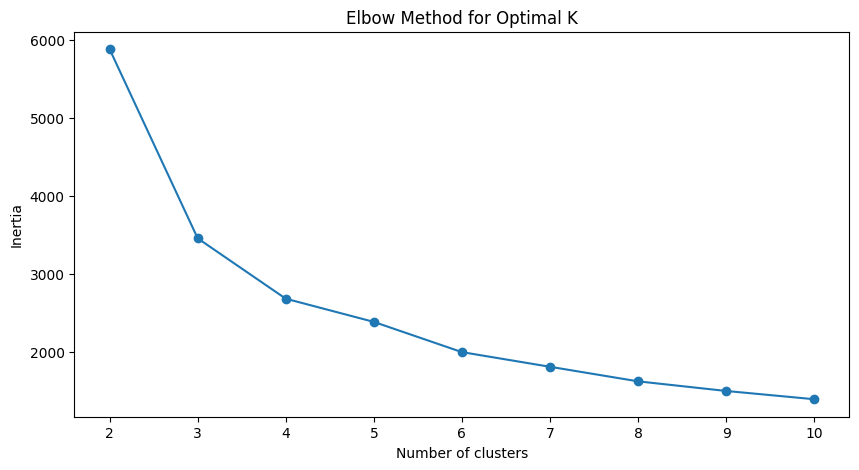

In [85]:
# Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(2,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=RANDOM_STATE)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
"""
Based on the graph, we can see that the cluster is significant when k =3 or 4
Here we choose the smallest significant value => k =3
"""

### SELF STUDY:
- Inertia: SUm of Squared Distances (SSD) between each data point and the centroid of the cluster it belongs to.
- Formula:
$$
Inertia = SSD = \sum_{i=1}^{k}\sum_{x \in C_i } (||x - {x_i}||)^2
$$

k: number of clusters \
$C_i$: cluster i \
$x_i$: centroid of cluster i \
||x - xi||2: Euclidean distance

### 7. Apply K-means Clustering

✅ Task for students: Using the chosen optimal `k` (e.g., 4), perform K-means clustering.

In [86]:
# Apply K-means with optimal number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=RANDOM_STATE)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled_df)

In [87]:
# Preview clustered data
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
2,12348.0,75,4,1797.24,3
3,12349.0,19,1,1757.55,3
4,12350.0,310,1,334.40,0
5,12352.0,36,8,2506.04,2
6,12353.0,204,1,89.00,0


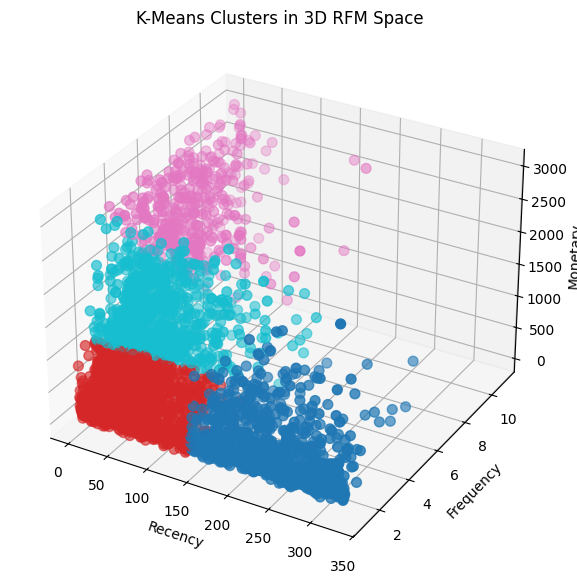

In [ ]:
#Visualize Clusters in 3D space
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'],
           c=rfm['Cluster'], cmap='tab10', s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('K-Means Clusters in 3D RFM Space')

plt.show()


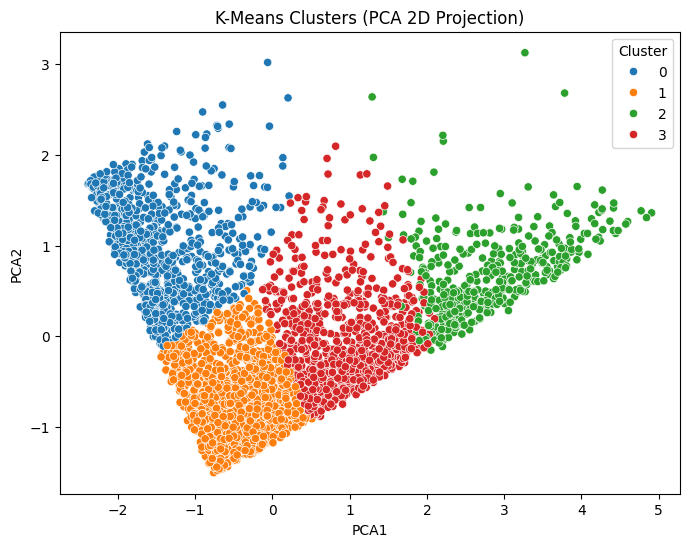

In [ ]:
#Visualize using PCA (since 3 features -> have to reduce)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D with PCA
pca = PCA(n_components=2)
rfm_2d = pca.fit_transform(rfm_scaled_df)

# Add PCA columns to dataframe
rfm['PCA1'] = rfm_2d[:, 0]
rfm['PCA2'] = rfm_2d[:, 1]

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('K-Means Clusters (PCA 2D Projection)')
plt.show()


### 8. Cluster Insights and Interpretation
✅ Task for students: Interpret each cluster based on average **Recency**, **Frequency**, and **Monetary** average (mean) values across the clusters.
- find the mean value for each of the three variables for each cluster
- normalize this value by dividing it by maximum mean value across the different clusters: mean recency cluster 1/maximum mean of recency across all clusters

In [91]:
# Calculate average values per cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary' : 'mean'
}).round(2)
print(cluster_summary)

         Recency  Frequency  Monetary
Cluster                              
0         231.11       1.48    398.96
1          51.89       1.63    416.68
2          30.76       6.96   2161.56
3          47.04       3.79   1249.74


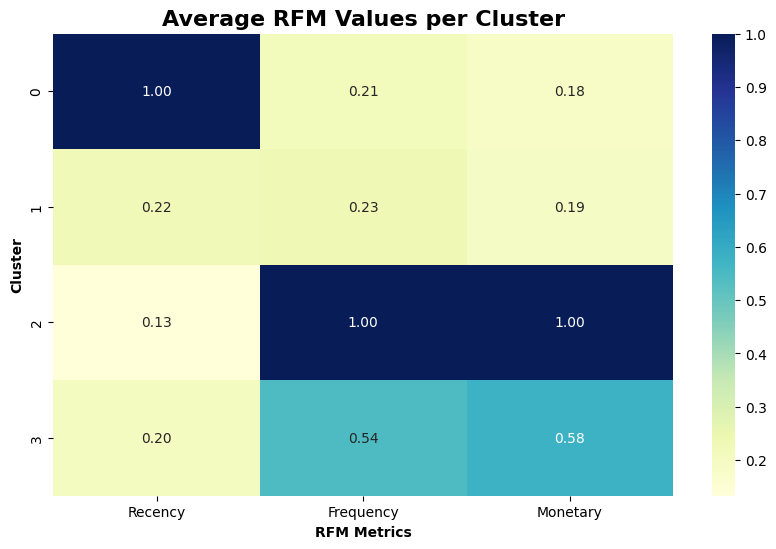

In [92]:
# normalize per feature. Otherwise, it is impossible to compare the clusters
# your code here
cluster_summary /=cluster_summary.max(axis=0)

# Plot heatmap of cluster summary
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Average RFM Values per Cluster", fontsize=16, fontweight='bold')
plt.xlabel("RFM Metrics", fontweight='bold')
plt.ylabel("Cluster", fontweight='bold')
plt.show()

### 10. Conclusion and Recommendations

✅ Task for students: Discuss insights such as which customer segments are "high-value" or "at risk" of churning, and potential strategies to engage each segment.

In [ ]:
#answer = 
'''
- The lower Recency, the newer perchase they do.

Cluster 0: High Recency , low on frequency and monetary. These are old customers that seemed to not buying our products anymore. Need to have some advertising strategies to get them back., --> "reengage" strategy 
Cluster 1: low recency, low frequency and low monetary. These are new customers or infrequent buyers -> special offers.
Cluster 2: low recency, high frequency and high monetary. Big spender -Loyal Customers --> Reward.
Cluster 3: low recency, mid frequency and mid monetary. Normal spenders, --> targeted with personalized Angebot to increase loyalty.
    '''